In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
print("Kaggle API is installed and working!")


Kaggle API is installed and working!


In [10]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API authentication successful!")


Kaggle API authentication successful!


In [13]:
competitions = api.competitions_list()
for comp in competitions[:5]:  # Show first 5 competitions
    print(f"{comp.ref}: {comp.title}")


https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2: AI Mathematical Olympiad - Progress Prize 2
https://www.kaggle.com/competitions/konwinski-prize: Konwinski Prize
https://www.kaggle.com/competitions/czii-cryo-et-object-identification: CZII - CryoET Object Identification
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions: CIBMTR - Equity in post-HCT Survival Predictions
https://www.kaggle.com/competitions/santa-2024: Santa 2024 - The Perplexity Permutation Puzzle


In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import kaggle
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
# %load_ext autoreload
# %autoreload 2
np.random.seed()
tqdm.pandas()

# Reading data to pandas dataframe
Let's use London Smart Meters dataset from Kaggle for the current exercise. The source of the data is from London Data Store and Jean-Michel D. has augumented the dataset with a few more details and packaged it as a Kaggle Dataset.

# About the Dataset
London Data Store, free and open data-sharing portal, provided this dataset, which was collected and enriched by Jean-Michel D and uploaded on Kaggle @ https://www.kaggle.com/jeanmidev/smart-meters-in-london. The dataset has energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014. Readings were taken at half hourly intervals. Some metadata about the households are also available as part of the dataset.

# Data Wrangling
The Kaggle dataset also has the time series data preprocessed on a daily level and combined all the separate files, etc. But let’s ignore those files and start with the raw files, which is in the hhblock_dataset folder.

In [19]:
os.makedirs("imgs/chapter_2", exist_ok=True)
source_data = Path("data/london_smart_meters/")
block_data_path = source_data/"hhblock_dataset"/"hhblock_dataset"

In [21]:
import os

print(f"Expected path: {block_data_path}")
print(f"Does path exist? {block_data_path.exists()}")
print(f"Is it a directory? {block_data_path.is_dir()}")
print("Available folders in 'data/london_smart_meters/':", os.listdir("data/london_smart_meters") if os.path.exists("data/london_smart_meters") else "Folder not found")


Expected path: data/london_smart_meters/hhblock_dataset/hhblock_dataset
Does path exist? False
Is it a directory? False
Available folders in 'data/london_smart_meters/': ['uk_bank_holidays.csv', 'weather_hourly_darksky.csv', 'smart_meters.zip']


In [65]:
import os
print(os.path.abspath("data/london_smart_meters.zip"))


/Users/tomaszosuchowski/data/london_smart_meters.zip


In [66]:
import os
print(os.path.exists("/Users/tomaszosuchowski/data/london_smart_meters/smart_meters.zip"))


True


In [70]:
block_data_path.mkdir(parents=True, exist_ok=True)



In [73]:
print(block_data_path.exists())  # Should now return True
print(block_data_path.is_dir())  # Should return True
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly. Refer to the Preface of the book or the Readme in the repo for expected data"


True
True


In [76]:
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly. Refer to the Preface of the book or the Readme in the repo for expected data"

# Converting the half hourly block level dataset into a time series data
Let's pick one block and see how we can transform the data.

In [98]:
print(block_data_path / "block_0.csv")  # Print the full path
print((block_data_path / "block_0.csv").exists())  # Check if the file exists


/Users/tomaszosuchowski/data/london_smart_meters/hhblock_dataset/hhblock_dataset/block_0.csv
False


In [92]:
print(os.listdir(block_data_path))


[]


In [96]:
import os
print(os.path.exists(block_data_path))  # Should return True if the path exists


True


In [100]:
import os
print(os.access(block_data_path, os.R_OK))  # Check read permission


file_path = os.path.join(block_data_path, "block_0.csv")
print("File exists:", os.path.exists(file_path))


True
File exists: False


In [104]:
os.makedirs("imgs/chapter_2", exist_ok=True)
source_data = Path("data/london_smart_meters/")
block_data_path = source_data/"hhblock_dataset"/"hhblock_dataset"

In [112]:
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly."

# Converting the half hourly block level dataset into a time series data
Let's pick one block and see how we can transform the data.

In [207]:
import pandas as pd
from pathlib import Path

# Define path
block_data_path = Path("data/london_smart_meters/hhblock_dataset")

# Check if the file exists before loading
block_file = block_data_path / "block_0.csv"

if block_file.exists():
    block_1 = pd.read_csv(block_file, parse_dates=False)
    block_1['day'] = pd.to_datetime(block_1['day'], yearfirst=True)
    print(block_1.head())
else:
    print(f"⚠️ Error: File not found - {block_file}")
    print("📌 Make sure you've downloaded and extracted the dataset.")


       LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002 2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002 2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002 2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002 2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002 2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4  0.25

In [117]:
ls -la data/london_smart_meters/


total 48
drwxr-xr-x    7 tomaszosuchowski  staff    224 Jan 30 16:03 ./
drwxr-xr-x  440 tomaszosuchowski  staff  14080 Jan 29 18:11 ../
-rw-r--r--@   1 tomaszosuchowski  staff   6148 Jan 30 16:03 .DS_Store
drwxr-xr-x    4 tomaszosuchowski  staff    128 Jan 30 16:03 hhblock_dataset/
-rw-r--r--    1 tomaszosuchowski  staff   4918 Jan 29 18:12 smart_meters.zip
-rw-r--r--    1 tomaszosuchowski  staff   1256 Jan 29 18:12 uk_bank_holidays.csv
-rw-r--r--    1 tomaszosuchowski  staff   1256 Jan 29 18:12 weather_hourly_darksky.csv


In [119]:
import os

search_path = "data/london_smart_meters/"
for root, dirs, files in os.walk(search_path):
    for file in files:
        if file.endswith(".csv"):
            print(f"Found: {os.path.join(root, file)}")


Found: data/london_smart_meters/uk_bank_holidays.csv
Found: data/london_smart_meters/weather_hourly_darksky.csv


In [123]:
import pandas as pd
from pathlib import Path

# Define the path to the dataset
block_data_path = Path("data/london_smart_meters/hhblock_dataset")
block_file = block_data_path / "block_0.csv"

# Load the CSV file and process it
if block_file.exists():
    block_1 = pd.read_csv(block_file, parse_dates=False)
    # Convert the 'day' column to datetime if it exists
    if 'day' in block_1.columns:
        block_1['day'] = pd.to_datetime(block_1['day'], yearfirst=True)
    print(block_1.head())
else:
    print(f"⚠️ File not found: {block_file}")



       LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002 2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002 2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002 2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002 2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002 2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4  0.25

In [126]:
#Check End Dates of all time series
block_1.groupby("LCLid")['day'].max().sample(5)

LCLid
MAC005492   2014-02-27
MAC003740   2014-02-27
MAC003863   2014-02-27
MAC003463   2013-08-11
MAC004034   2013-09-18
Name: day, dtype: datetime64[ns]

In [131]:
max_date = None
for f in tqdm(block_data_path.glob("*.csv")):
    df = pd.read_csv(f, parse_dates=False)
    df['day'] = pd.to_datetime(df['day'], yearfirst=True)
    if max_date is None:
        max_date = df['day'].max()
    else:
        if df['day'].max()>max_date:
            max_date = df['day'].max()
print(f"Max Date across all blocks: {max_date}")
del df

0it [00:00, ?it/s]

Max Date across all blocks: 2014-02-27 00:00:00


In [151]:
import pandas as pd

# Load the CSV file again
block_1 = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_0.csv", parse_dates=False)

# Print the first few rows to verify
print(block_1.head())

       LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4

In [153]:
# Identify the hourly columns
hour_columns = [col for col in block_1.columns if col.startswith("hh_")]

# Reshape the DataFrame using `stack()`
reshaped_block_1 = (
    block_1.set_index(['LCLid', 'day'])[hour_columns]  # Set LCLid and day as index
    .stack()  # Stack only the hourly columns
    .reset_index()  # Reset index to flatten
    .rename(columns={"level_2": "hour_block", 0: "energy_consumption"})  # Rename columns
)

# Convert 'hour_block' to numeric offsets (hour numbers)
reshaped_block_1['offset'] = reshaped_block_1['hour_block'].str.replace("hh_", "", regex=False).astype(int)

# Print the first few rows to verify
print(reshaped_block_1.head())


       LCLid         day hour_block  energy_consumption  offset
0  MAC000002  2012-10-13       hh_0               0.263       0
1  MAC000002  2012-10-13       hh_1               0.269       1
2  MAC000002  2012-10-13       hh_2               0.275       2
3  MAC000002  2012-10-13       hh_3               0.256       3
4  MAC000002  2012-10-13       hh_4               0.211       4


In [159]:
print(block_1.columns)


Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


In [162]:
# Identify the hourly columns
hour_columns = [col for col in block_1.columns if col.startswith("hh_")]

# Reshape the DataFrame to long format
reshaped_block_1 = (
    block_1.set_index(['LCLid', 'day'])[hour_columns]
    .stack()
    .reset_index()
    .rename(columns={"level_2": "hour_block", 0: "energy_consumption"})
)

# Convert 'hour_block' to numerical hour offsets
reshaped_block_1['offset'] = reshaped_block_1['hour_block'].str.replace("hh_", "", regex=False).astype(int)

# Print the first few rows
print(reshaped_block_1.head())


       LCLid         day hour_block  energy_consumption  offset
0  MAC000002  2012-10-13       hh_0               0.263       0
1  MAC000002  2012-10-13       hh_1               0.269       1
2  MAC000002  2012-10-13       hh_2               0.275       2
3  MAC000002  2012-10-13       hh_3               0.256       3
4  MAC000002  2012-10-13       hh_4               0.211       4


In [165]:
print(reshaped_block_1.columns)


Index(['LCLid', 'day', 'hour_block', 'energy_consumption', 'offset'], dtype='object')


In [168]:
print(reshaped_block_1['hour_block'].unique())


['hh_0' 'hh_1' 'hh_2' 'hh_3' 'hh_4' 'hh_5' 'hh_6' 'hh_7' 'hh_8' 'hh_9'
 'hh_10' 'hh_11' 'hh_12' 'hh_13' 'hh_14' 'hh_15' 'hh_16' 'hh_17' 'hh_18'
 'hh_19' 'hh_20' 'hh_21' 'hh_22' 'hh_23' 'hh_24' 'hh_25' 'hh_26' 'hh_27'
 'hh_28' 'hh_29' 'hh_30' 'hh_31' 'hh_32' 'hh_33' 'hh_34' 'hh_35' 'hh_36'
 'hh_37' 'hh_38' 'hh_39' 'hh_40' 'hh_41' 'hh_42' 'hh_43' 'hh_44' 'hh_45'
 'hh_46' 'hh_47']


In [175]:
reshaped_block_1['day'] = pd.to_datetime(reshaped_block_1['day'], format="%Y-%m-%d")



In [181]:
print(block1_compact.head())


       LCLid start_timestamp frequency  \
0  MAC000002      2012-10-13     30min   
1  MAC000246      2011-12-04     30min   
2  MAC000450      2012-03-23     30min   
3  MAC001074      2012-05-09     30min   
4  MAC003223      2012-09-18     30min   

                                  energy_consumption  series_length  
0  [0.263, 0.2689999999999999, 0.275, 0.256, 0.21...          24144  
1  [0.175, 0.098, 0.144, 0.065, 0.071, 0.037, 0.0...          39216  
2  [1.337, 1.426, 0.996, 0.971, 0.994, 0.952, 0.8...          33936  
3  [0.18, 0.086, 0.106, 0.173, 0.146, 0.223, 0.21...          31680  
4  [0.076, 0.079, 0.123, 0.109, 0.051, 0.069, 0.0...          25344  


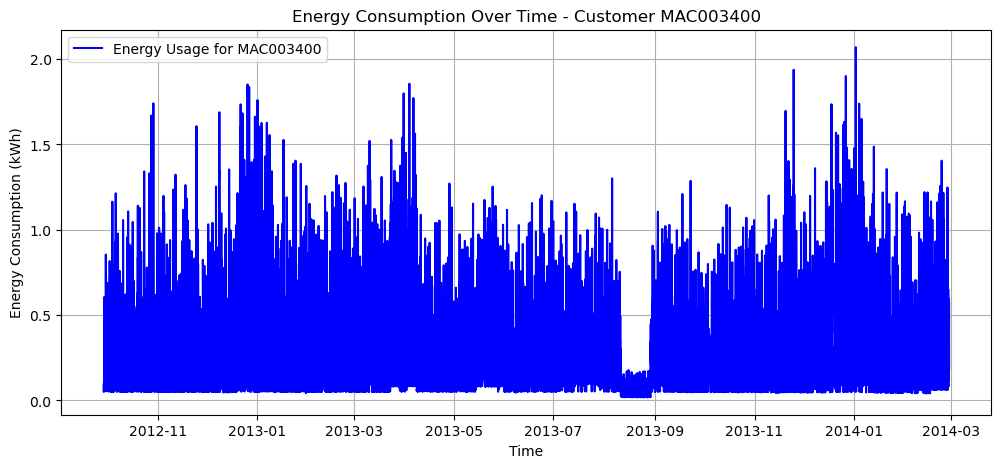

In [185]:
# Select a random customer
random_customer = random.choice(block1_compact["LCLid"].unique())

# Extract the customer's energy consumption and timestamps
customer_data = block1_compact[block1_compact["LCLid"] == random_customer]
timestamps = pd.date_range(start=customer_data["start_timestamp"].values[0], periods=customer_data["series_length"].values[0], freq="30min")
energy_values = np.array(customer_data["energy_consumption"].values[0])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, energy_values, label=f"Energy Usage for {random_customer}", color="blue")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title(f"Energy Consumption Over Time - Customer {random_customer}")
plt.legend()
plt.grid(True)
plt.show()


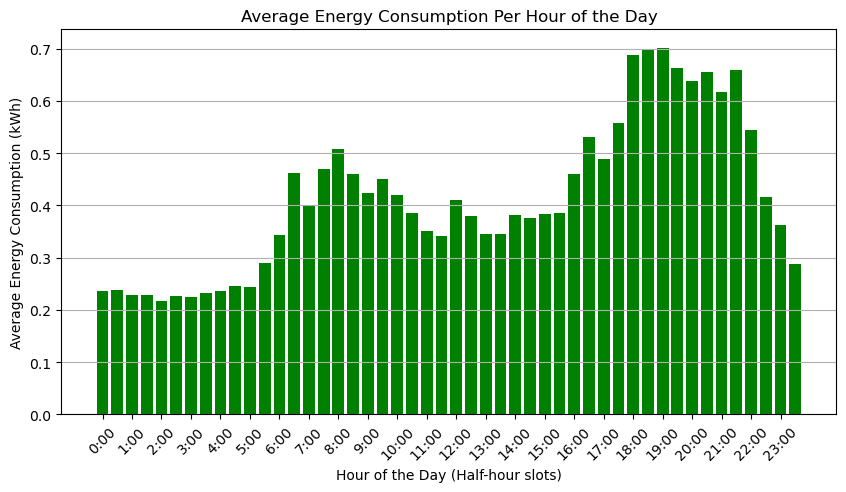

In [187]:
# Convert energy consumption series into a NumPy array for easy averaging
hourly_consumption = np.zeros(48)  # Since we have 48 half-hour slots
counts = np.zeros(48)

for i, row in block1_compact.iterrows():
    energy_values = np.array(row["energy_consumption"])
    hourly_consumption += energy_values[:48]  # First 48 values (1 day)
    counts += 1

# Compute the average energy consumption per hour
hourly_avg = hourly_consumption / counts

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(48), hourly_avg, color="green")
plt.xlabel("Hour of the Day (Half-hour slots)")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption Per Hour of the Day")
plt.xticks(range(0, 48, 2), labels=[f"{h//2}:30" if h % 2 else f"{h//2}:00" for h in range(0, 48, 2)], rotation=45)
plt.grid(axis="y")
plt.show()


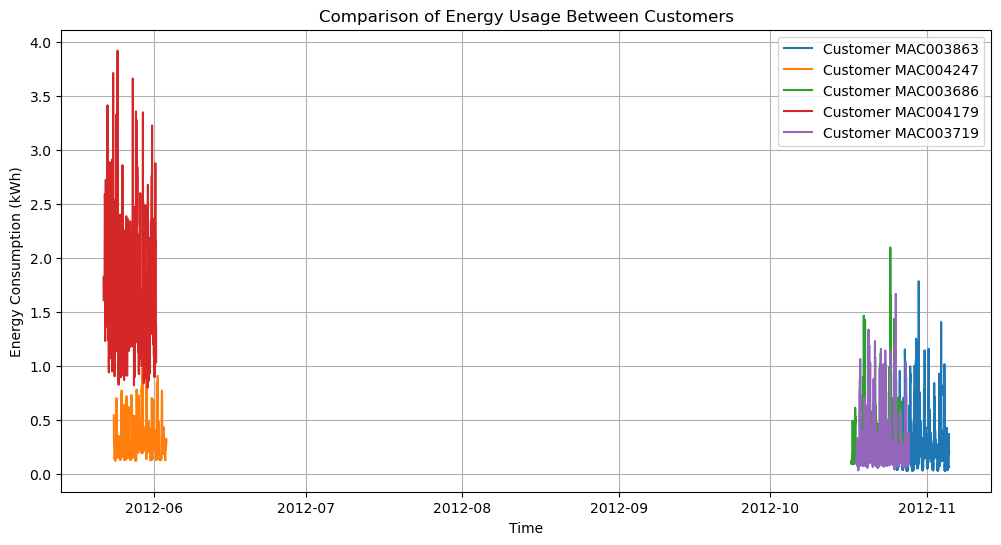

In [189]:
# Select 5 random customers
random_customers = random.sample(list(block1_compact["LCLid"].unique()), 5)

plt.figure(figsize=(12, 6))

for customer in random_customers:
    customer_data = block1_compact[block1_compact["LCLid"] == customer]
    timestamps = pd.date_range(start=customer_data["start_timestamp"].values[0], periods=customer_data["series_length"].values[0], freq="30min")
    energy_values = np.array(customer_data["energy_consumption"].values[0])

    # Plot each customer's energy usage
    plt.plot(timestamps[:500], energy_values[:500], label=f"Customer {customer}")

plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Comparison of Energy Usage Between Customers")
plt.legend()
plt.grid(True)
plt.show()


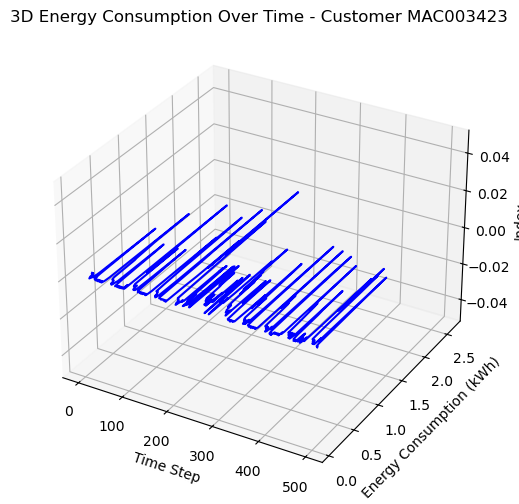

In [191]:
from mpl_toolkits.mplot3d import Axes3D

# Select a random customer
random_customer = random.choice(block1_compact["LCLid"].unique())

# Extract customer data
customer_data = block1_compact[block1_compact["LCLid"] == random_customer]
timestamps = pd.date_range(start=customer_data["start_timestamp"].values[0], periods=customer_data["series_length"].values[0], freq="30min")
energy_values = np.array(customer_data["energy_consumption"].values[0])

# Convert timestamps to numerical values
time_numeric = np.arange(len(timestamps))

# Create 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(time_numeric[:500], energy_values[:500], zs=0, zdir="z", label="Energy Consumption", color="blue")

ax.set_xlabel("Time Step")
ax.set_ylabel("Energy Consumption (kWh)")
ax.set_zlabel("Index")
ax.set_title(f"3D Energy Consumption Over Time - Customer {random_customer}")

plt.show()


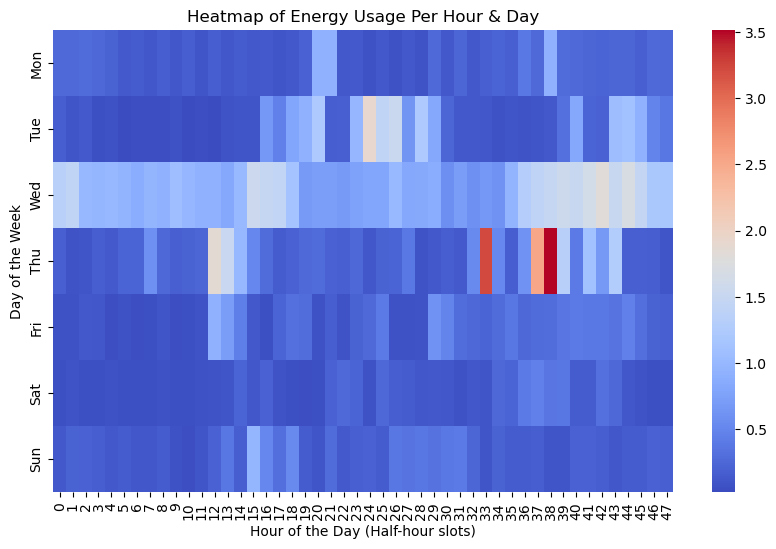

In [196]:
import seaborn as sns

# Create a matrix of hourly energy consumption averages
hourly_avg_matrix = np.zeros((7, 48))  # 7 days, 48 half-hour slots

# Iterate over the first 7 customers
for i, row in block1_compact.iloc[:7].iterrows():
    energy_values = np.array(row["energy_consumption"])[:48]
    hourly_avg_matrix[i, :] = energy_values

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_avg_matrix, cmap="coolwarm", xticklabels=range(48), yticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Hour of the Day (Half-hour slots)")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Energy Usage Per Hour & Day")
plt.show()


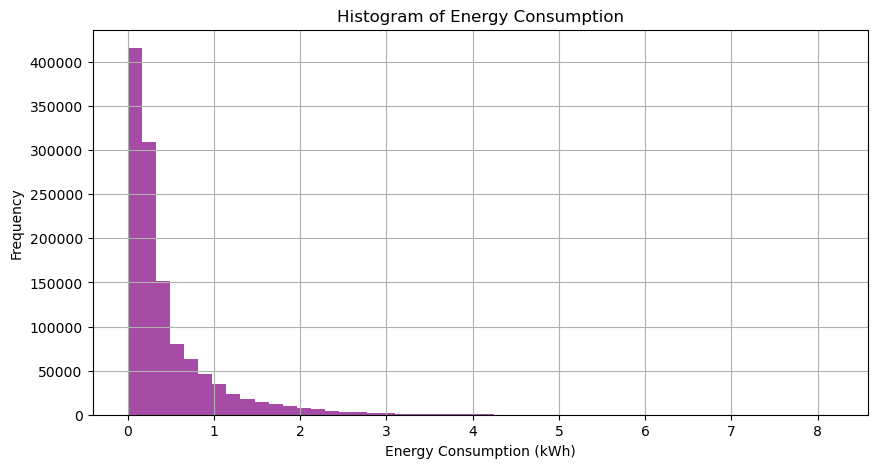

In [200]:
plt.figure(figsize=(10, 5))
all_energy_values = np.concatenate(block1_compact["energy_consumption"].values)
plt.hist(all_energy_values, bins=50, color="purple", alpha=0.7)

plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption")
plt.grid(True)
plt.show()


# Compact Form

In [202]:
def preprocess_compact(x):
    start_date = x['day'].min()
    name = x['LCLid'].unique()[0]
    ### Fill missing dates with NaN ###
    # Create a date range from  min to max
    dr = pd.date_range(start=x['day'].min(), end=max_date, freq="1D")
    # Add hh_0 to hh_47 to columns and with some unstack magic recreating date-hh_x combinations
    dr = pd.DataFrame(columns=[f"hh_{i}" for i in range(48)], index=dr).unstack().reset_index()
    # renaming the columns
    dr.columns = ["hour_block", "day", "_"]
    # left merging the dataframe to the standard dataframe
    # now the missing values will be left as NaN
    dr = dr.merge(x, on=['hour_block','day'], how='left')
    # sorting the rows
    dr.sort_values(['day',"offset"], inplace=True)
    # extracting the timeseries array
    ts = dr['energy_consumption'].values
    len_ts = len(ts)
    return start_date, name, ts, len_ts

In [208]:
print("block_1 columns:", block_1.columns)




block_1 columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


In [211]:
block_1_melted = block_1.melt(id_vars=["LCLid", "day"], var_name="hour_block", value_name="energy_consumption")


In [214]:
print(block_1_melted.head())


       LCLid        day hour_block  energy_consumption
0  MAC000002 2012-10-13       hh_0               0.263
1  MAC000002 2012-10-14       hh_0               0.262
2  MAC000002 2012-10-15       hh_0               0.192
3  MAC000002 2012-10-16       hh_0               0.237
4  MAC000002 2012-10-17       hh_0               0.157


In [217]:
block_1_melted["hour_block"] = block_1_melted["hour_block"].astype(str).str.replace("hh_", "").astype(int)



In [220]:
print(block_1_melted.head())


       LCLid        day  hour_block  energy_consumption
0  MAC000002 2012-10-13           0               0.263
1  MAC000002 2012-10-14           0               0.262
2  MAC000002 2012-10-15           0               0.192
3  MAC000002 2012-10-16           0               0.237
4  MAC000002 2012-10-17           0               0.157


In [244]:
block_1_melted["hour_block"] = block_1_melted["hour_block"].astype(str)


In [249]:
def load_process_block_compact(block_df, freq="30min", ts_identifier="series_name", value_name="series_value"):
    grps = block_df.groupby('LCLid')
    all_series = []
    all_start_dates = []
    all_names = []
    all_data = {}
    all_len = []

    for idx, df in tqdm(grps, leave=False):
        start_date, name, ts, len_ts = preprocess_compact(df)
        all_series.append(ts)
        all_start_dates.append(start_date)
        all_names.append(name)
        all_len.append(len_ts)

    all_data[ts_identifier] = all_names
    all_data['start_timestamp'] = all_start_dates
    all_data['frequency'] = freq
    all_data[value_name] = all_series
    all_data['series_length'] = all_len

    return pd.DataFrame(all_data)


In [260]:
def preprocess_compact(x):
    # Creating a copy of the input DataFrame
    dr = x.copy()

    # Sorting the rows by 'day'
    dr.sort_values(['day'], inplace=True)

    # Extracting the timeseries array
    ts = dr['energy_consumption'].values
    len_ts = len(ts)

    # Returning extracted information
    return dr['day'].min(), x['LCLid'].iloc[0], ts, len_ts


In [263]:
block1_compact = load_process_block_compact(block_1_melted, freq="30min", ts_identifier="LCLid", value_name="energy_consumption")



  0%|          | 0/50 [00:00<?, ?it/s]

In [265]:
block1_compact.head()

,LCLid,start_timestamp,frequency,energy_consumption,series_length
0,MAC000002,2012-10-13,30min,"[0.263, 0.161, 0.134, 0.235, 0.124, 0.136, 0.1...",23904
1,MAC000246,2011-12-04,30min,"[0.175, 0.634, 1.219, 0.821, 0.233, 0.144, 0.1...",39072
2,MAC000450,2012-03-23,30min,"[1.337, 1.012, 0.971, 0.826, 0.842000000000000...",19680
3,MAC001074,2012-05-09,30min,"[0.18, 1.86, 0.089, 1.523, 1.0, 0.39, 0.086, 0...",10656
4,MAC003223,2012-09-18,30min,"[0.076, 0.077, 0.392, 0.083, 0.252, 0.051, 0.0...",25248


In [267]:
display(block1_compact.memory_usage(deep=True))
print(f"Total: {block1_compact.memory_usage(deep=True).sum()/1024**2} MB")

Index                  132
LCLid                 2900
start_timestamp        400
frequency             2700
energy_consumption    6000
series_length          400
dtype: int64

Total: 0.011951446533203125 MB


# Expanded Form

In [288]:
def preprocess_expanded(x):
    start_date = x['day'].min()

    ### Fill missing dates with NaN ###
    dr = pd.date_range(start=start_date, end=x['day'].max(), freq="1D")
    dr = pd.MultiIndex.from_product([dr, range(48)], names=["day", "hour_block"]).to_frame(index=False)

    # Format 'hour_block' correctly
    dr["hour_block"] = dr["hour_block"].apply(lambda x: f"hh_{x}")

    # Debugging prints
    print("Columns in x before melting:", x.columns)

    # Reshape x: Convert hh_0, hh_1, ..., hh_47 into a long format with 'hour_block'
    x_melted = x.melt(id_vars=['LCLid', 'day'], var_name='hour_block', value_name='energy_consumption')

    # Ensure 'hour_block' is formatted correctly
    x_melted['hour_block'] = x_melted['hour_block'].astype(str)

    # Debugging print after melting
    print("Columns in x after melting:", x_melted.columns)

    # Merge with the corrected format
    dr = dr.merge(x_melted, on=['hour_block', 'day'], how='left')

    return dr


In [292]:
print("Shape of block_1 DataFrame:", block_1.shape)
print(block_1.head())

Shape of block_1 DataFrame: (25286, 50)
       LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002 2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002 2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002 2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002 2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002 2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  


In [294]:
def load_process_block_expanded(block_df, freq="30min"):
    print("Initial shape of block_df:", block_df.shape)  # Print shape from the start

    grps = block_df.groupby('LCLid')
    all_series = []

    for idx, df in tqdm(grps, leave=False):
        print(f"Processing LCLid: {idx} with shape: {df.shape}")
        ts = preprocess_expanded(df)
        all_series.append(ts)

    if not all_series:
        print("No series generated from groups.")
        return pd.DataFrame()  # Return empty DataFrame if no groups processed

    block_df = pd.concat(all_series)

    # Debugging the shape of block_df after concatenation
    print("Shape of concatenated DataFrame:", block_df.shape)

    if block_df.empty:
        print("Concatenated DataFrame is empty.")
        return block_df  # Return empty DataFrame

    # Recreate Offset because there would be null rows now
    block_df['offset'] = block_df['hour_block'].str.replace("hh_", "").astype(int)

    # Creating a datetime column with the date
    block_df['timestamp'] = block_df['day'] + block_df['offset'] * 30 * pd.offsets.Minute()

    print("Number of null timestamps:", block_df['timestamp'].isnull().sum())

    block_df['frequency'] = freq
    block_df.sort_values(["LCLid", "timestamp"], inplace=True)

    # Ensure columns to drop exist before dropping
    cols_to_drop = ["_", "hour_block", "offset", "day"]
    existing_cols_to_drop = [col for col in cols_to_drop if col in block_df.columns]
    block_df.drop(columns=existing_cols_to_drop, inplace=True)

    print("Final shape of block_df before return:", block_df.shape)  # Print the final shape
    return block_df

# Call the function and check the returned DataFrame
block1_expanded = load_process_block_expanded(block_1, freq="30min")
print("Resulting DataFrame shape:", block1_expanded.shape)
print(block1_expanded.head())

Initial shape of block_df: (25286, 50)


  0%|          | 0/50 [00:00<?, ?it/s]

Processing LCLid: MAC000002 with shape: (498, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_consumption'], dtype='object')
Processing LCLid: MAC000246 with shape: (814, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_consumption'], dtype='object')
Processing LCLid: MAC003400 with shape: (511, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_consumption'], dtype='object')
Processing LCLid: MAC003422 with shape: (494, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_1

Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_consumption'], dtype='object')
Processing LCLid: MAC003656 with shape: (500, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', '

Processing LCLid: MAC003844 with shape: (488, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_consumption'], dtype='object')
Processing LCLid: MAC003851 with shape: (489, 50)
Columns in x before melting: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh

Shape of concatenated DataFrame: (1229280, 4)


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_11591/3763361935.py:29: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  block_df['timestamp'] = block_df['day'] + block_df['offset'] * 30 * pd.offsets.Minute()


Number of null timestamps: 0
Final shape of block_df before return: (1229280, 4)
Resulting DataFrame shape: (1229280, 4)
       LCLid  energy_consumption            timestamp frequency
0  MAC000002               0.263  2012-10-13 00:00:00     30min
1  MAC000002               0.269  2012-10-13 00:30:00     30min
2  MAC000002               0.275  2012-10-13 01:00:00     30min
3  MAC000002               0.256  2012-10-13 01:30:00     30min
4  MAC000002               0.211  2012-10-13 02:00:00     30min


In [295]:
display(block1_expanded.memory_usage())
print(f"Total: {block1_expanded.memory_usage().sum()/1024**2} MB")

Index                 9834240
LCLid                 9834240
energy_consumption    9834240
timestamp             9834240
frequency             9834240
dtype: int64

Total: 46.893310546875 MB


In [296]:
del block1_expanded, block_1, block1_compact

In [298]:
block_df_l = []
for file in tqdm(sorted(list(block_data_path.glob("*.csv"))), desc="Processing Blocks.."):
    block_df = pd.read_csv(file, parse_dates=False)
    block_df['day'] = pd.to_datetime(block_df['day'], yearfirst=True)
    # Taking only from 2012-01-01
    block_df = block_df.loc[block_df['day']>="2012-01-01"]
    #Reshaping the dataframe into the long form with hour blocks along the rows
    block_df = block_df.set_index(['LCLid', "day"]).stack().reset_index().rename(columns={"level_2": "hour_block", 0: "energy_consumption"})
    #Creating a numerical hourblock column
    block_df['offset'] = block_df['hour_block'].str.replace("hh_", "").astype(int)
    block_df_l.append(load_process_block_compact(block_df, freq="30min", ts_identifier="LCLid", value_name="energy_consumption"))

Processing Blocks..:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [307]:
def load_process_block_expanded(block_df, freq="30min"):
    print("Initial shape of block_df:", block_df.shape)
    
    block_df_l = []  # Define block_df_l as an empty list here

    grps = block_df.groupby('LCLid')
    
    for idx, df in tqdm(grps, leave=False):
        print(f"Processing LCLid: {idx} with shape: {df.shape}")
        ts = preprocess_expanded(df)
        block_df_l.append(ts)  # Store each processed DataFrame in block_df_l

    # Concatenate all DataFrames in block_df_l afterwards
    hhblock_df = pd.concat(block_df_l)
    
    return hhblock_df  


In [310]:
display(hhblock_df.memory_usage(deep=True))
print(f"Total: {hhblock_df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

Index                  132
LCLid                 2900
start_timestamp        400
frequency             2700
energy_consumption    6000
series_length          400
dtype: int64

Total: 0.01 MB


In [312]:
hhblock_df.head()

,LCLid,start_timestamp,frequency,energy_consumption,series_length
0,MAC000002,2012-10-13,30min,"[0.263, 0.076, 0.133, 0.085, 0.263, 0.134, 0.2...",23903
1,MAC000246,2012-01-01,30min,"[0.509, 0.789, 0.315, 0.356, 0.605, 1.095, 0.9...",37727
2,MAC000450,2012-03-23,30min,"[1.337, 1.012, 0.826, 0.8420000000000001, 0.87...",19679
3,MAC001074,2012-05-09,30min,"[0.18, 0.222, 0.39, 0.089, 0.125, 0.1669999999...",10655
4,MAC003223,2012-09-18,30min,"[0.076, 0.077, 0.072, 0.085, 0.623, 0.476, 0.2...",25247


# Merging additional information
# Household information

In [15]:
household_info = pd.read_csv("data/london_smart_meters/hhblock_dataset/informations_households.csv")
household_info.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [22]:
import pandas as pd
import os
import glob
# Define the path to the folder containing all CSV files
hhblock_path = "data/london_smart_meters/hhblock_dataset"
# List all files in the hhblock_dataset directory
print(os.listdir(hhblock_path))


['.DS_Store', 'hhblock_dataset', 'uk_bank_holidays.csv', 'block_1.csv', 'block_0.csv', 'informations_households.csv', 'weather_hourly_darksky.csv']


In [31]:
# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(hhblock_path, "*.csv"))

# Print the list of CSV files
print(f"Found CSV files: {csv_files}")

# Combine all CSV files into a single DataFrame

dataframes = [pd.read_csv(file, on_bad_lines="skip") for file in csv_files]

hhblock_df = pd.concat(dataframes, ignore_index=True)
temp_df = pd.read_csv(csv_files[0], on_bad_lines="skip")  # Example: Reading the first file

Found CSV files: ['data/london_smart_meters/hhblock_dataset/uk_bank_holidays.csv', 'data/london_smart_meters/hhblock_dataset/block_1.csv', 'data/london_smart_meters/hhblock_dataset/block_0.csv', 'data/london_smart_meters/hhblock_dataset/informations_households.csv', 'data/london_smart_meters/hhblock_dataset/weather_hourly_darksky.csv']


In [49]:
import pandas as pd

file_path = "data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv"

# Load with specified data types to avoid mixed types
df = pd.read_csv(file_path, dtype={"column_name_50": str, "column_name_51": str, 
                                   "column_name_52": str, "column_name_53": str}, 
                 low_memory=False)

# Drop the unwanted HTML-related column if it exists
if "<!doctype html>" in df.columns:
    df.drop(columns=["<!doctype html>"], inplace=True)

# Save the cleaned dataset
df.to_csv(file_path, index=False)

# ✅ Fixed f-string issue



In [52]:
import pandas as pd

file_path = "data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv"

# Load the CSV while treating specific columns as strings
df = pd.read_csv(file_path, dtype=str, low_memory=False)

# Display first few rows
df.head()


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_46,hh_47,stdorToU_x,Acorn_x,Acorn_grouped_x,file_x,stdorToU_y,Acorn_y,Acorn_grouped_y,file_y
0,MAC000323,2012-03-07,0.15,0.114,0.054,0.107,0.107,0.078,0.0819999999999999,0.105,...,0.397,0.098,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
1,MAC000323,2012-03-08,0.111,0.088,0.066,0.105,0.113,0.059,0.093,0.1119999999999999,...,0.63,0.8420000000000001,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
2,MAC000323,2012-03-09,0.6990000000000001,0.462,0.1169999999999999,0.108,0.081,0.086,0.102,0.09,...,0.745,0.7,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
3,MAC000323,2012-03-10,0.614,0.608,0.488,0.371,0.111,0.128,0.245,0.226,...,0.555,0.2769999999999999,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
4,MAC000323,2012-03-11,0.106,0.064,0.114,0.138,0.0969999999999999,0.062,0.113,0.147,...,0.732,0.2739999999999999,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1


In [54]:
# Convert numerical columns while keeping categorical data intact
for col in df.columns:
    if col.startswith("hh_"):  # Apply to half-hourly consumption data
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Display first few rows again
df.head()


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_46,hh_47,stdorToU_x,Acorn_x,Acorn_grouped_x,file_x,stdorToU_y,Acorn_y,Acorn_grouped_y,file_y
0,MAC000323,2012-03-07,0.150,0.114,0.054,0.107,0.107,0.078,0.082,0.105,...,0.397,0.098,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
1,MAC000323,2012-03-08,0.111,0.088,0.066,0.105,0.113,0.059,0.093,0.112,...,0.630,0.842,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
2,MAC000323,2012-03-09,0.699,0.462,0.117,0.108,0.081,0.086,0.102,0.090,...,0.745,0.700,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
3,MAC000323,2012-03-10,0.614,0.608,0.488,0.371,0.111,0.128,0.245,0.226,...,0.555,0.277,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
4,MAC000323,2012-03-11,0.106,0.064,0.114,0.138,0.097,0.062,0.113,0.147,...,0.732,0.274,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1


In [57]:
# Check missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
df_cleaned = df.dropna()


In [59]:
df_cleaned.describe()



,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_cleaned.nunique()


LCLid              0
day                0
hh_0               0
hh_1               0
hh_2               0
hh_3               0
hh_4               0
hh_5               0
hh_6               0
hh_7               0
hh_8               0
hh_9               0
hh_10              0
hh_11              0
hh_12              0
hh_13              0
hh_14              0
hh_15              0
hh_16              0
hh_17              0
hh_18              0
hh_19              0
hh_20              0
hh_21              0
hh_22              0
hh_23              0
hh_24              0
hh_25              0
hh_26              0
hh_27              0
hh_28              0
hh_29              0
hh_30              0
hh_31              0
hh_32              0
hh_33              0
hh_34              0
hh_35              0
hh_36              0
hh_37              0
hh_38              0
hh_39              0
hh_40              0
hh_41              0
hh_42              0
hh_43              0
hh_44              0
hh_45        

In [63]:
import matplotlib.pyplot as plt
df_cleaned['day'] = pd.to_datetime(df_cleaned['day'], errors='coerce')
print(df_cleaned['day'].dtypes)



datetime64[ns]


In [74]:
df['day'] = pd.to_datetime(df['day'], errors='coerce')


In [79]:

df_cleaned = df.dropna()


In [82]:
print(df_cleaned.shape)


(0, 58)


In [83]:
df_cleaned = df.dropna(subset=['day'])  # Drops only rows where 'day' is missing
print(df_cleaned.shape)


(56529, 58)


0


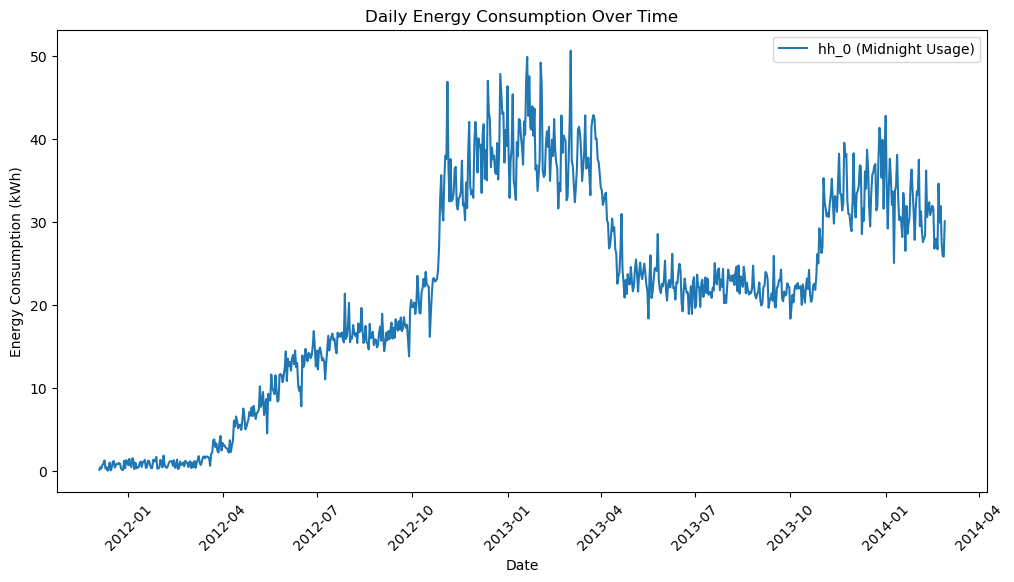

In [87]:
df_cleaned = df_cleaned.fillna(0)  # Replaces all NaN values with 0
print(df_cleaned.isnull().sum().sum())  # Should print 0 if all missing values are filled
import matplotlib.pyplot as plt

# Aggregate data by day
df_grouped = df_cleaned.groupby("day").sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped["hh_0"], label="hh_0 (Midnight Usage)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Daily Energy Consumption Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [90]:
df_cleaned.to_csv("cleaned_smart_meters.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_smart_meters.csv'")


✅ Cleaned dataset saved as 'cleaned_smart_meters.csv'


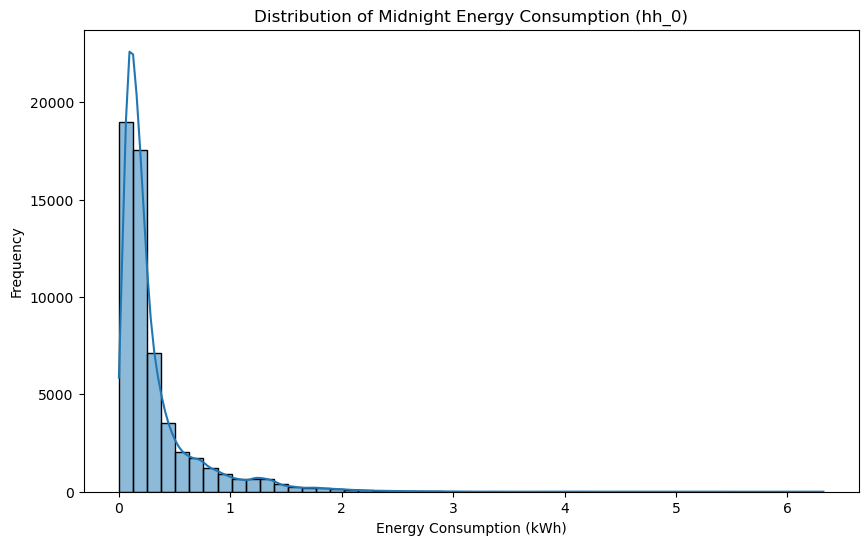

In [94]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["hh_0"], bins=50, kde=True)
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Midnight Energy Consumption (hh_0)")
plt.show()
